In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
train_data = pd.read_csv('./data/station3_20132014.csv')
train_data['MONTH'] = train_data['MONTH'].astype('object')
train_data['HOUR'] = train_data['HOUR'].astype('object')
train_data['WEEKDAY'] = train_data['WEEKDAY'].astype('object')
train_data['SEASON'] = train_data['SEASON'].astype('object')
del train_data['STATION']
del train_data['YEAR']
del train_data['DAY']
train_data.head(5)

,COUNT,MONTH,HOUR,WEEKDAY,SEASON,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY,SNOWFALL
0,0,1,0,2,3,8.8,0.0,0.1,90.0,8.8
1,0,1,1,2,3,8.5,0.0,0.9,90.0,8.8
2,0,1,2,2,3,8.5,0.0,1.0,89.0,8.8
3,0,1,3,2,3,9.0,0.0,0.7,91.0,8.8
4,0,1,4,2,3,9.1,0.0,0.6,92.0,8.8


In [3]:
test_data = pd.read_csv('./data/station3_20150101.csv')
test_data['MONTH'] = test_data['MONTH'].astype('object')
test_data['HOUR'] = test_data['HOUR'].astype('object')
test_data['WEEKDAY'] = test_data['WEEKDAY'].astype('object')
test_data['SEASON'] = test_data['SEASON'].astype('object')
del test_data['STATION']
del test_data['YEAR']
del test_data['DAY']
test_data.head(5)

,COUNT,MONTH,HOUR,WEEKDAY,SEASON,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY,SNOWFALL
0,0,1,0,4,3,4.1,0.3,4.2,82,0.5
1,0,1,1,4,3,5.7,0.0,2.8,74,0.5
2,0,1,2,4,3,6.4,0.0,2.6,60,0.5
3,0,1,3,4,3,6.5,0.0,2.7,53,0.5
4,0,1,4,4,3,6.6,0.0,2.5,61,0.5


In [4]:
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
y_train += np.ones(len(y_train), dtype = 'i') # to avoid divide_by_0
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values
y_test += np.ones(len(y_test), dtype = 'i')

In [5]:
# Randomforest를 통한 학습 진행
# Instantiate model with 50 decision trees
rf = RandomForestRegressor(n_estimators = 50)
# Train the model on training data
rf.fit(X_train, y_train)
predictions = rf.predict(X = X_test)

In [6]:
# 예측 영향도
importance = list(rf.feature_importances_)

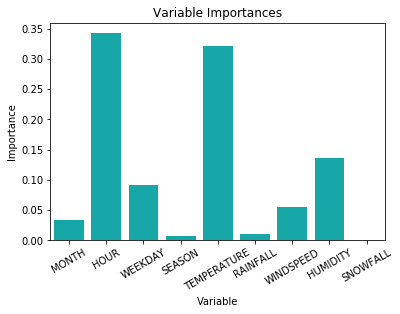

In [7]:
variable = ['MONTH','HOUR','WEEKDAY','SEASON','TEMPERATURE','RAINFALL','WINDSPEED','HUMIDITY','SNOWFALL']
ax = sns.barplot(x = variable, y = importance[:], color = 'c')
ax.set(xlabel='Variable', ylabel = 'Importance')
plt.xticks(np.arange(9),variable,rotation=30)
plt.title('Variable Importances')
plt.show()

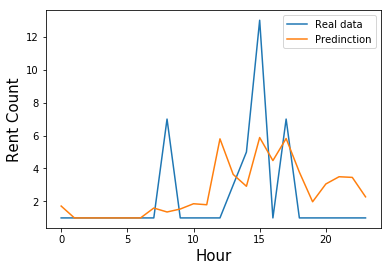

In [8]:
hour = test_data['HOUR']
count = test_data['COUNT']

plt.plot(hour, count, label = 'Real data')
plt.plot(hour, predictions, label = 'Predinction')

plt.xlabel('Hour', size = 15)
plt.ylabel('Rent Count', size = 15)
plt.legend()
plt.show()

In [9]:
# RSME 계산
errors = np.sqrt(np.mean((predictions-y_test)**2))
print('Errors : ', round(errors, 2), 'degrees.')

Errors :  2.53 degrees.
